<a href="https://colab.research.google.com/github/jbouhadana13/Data-Mining-Projects/blob/main/ACT1_STA5706.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ACT1** **STA5706**




In [ ]:
#import libraries
import pandas as pd               # Pandas handles dataframes
import numpy as np
import scipy
import matplotlib                 # Numpy handles lots of basic maths operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns             # Seaborn for beautiful plots
import statsmodels
from scipy.stats import skew
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.special import logit
import math


Problem 1.1 (5 Points) Read the EXCLE CSV file “LOGITData.csv”



In [ ]:
# 1.1

filename = 'LOGITData.csv'
df = pd.read_csv(filename)


Problem 1.2 (5 Points) Produce a scatter plot using “BsmtFinSF1” and “SalePrice” and impose a loess line on the top of the data.

<function matplotlib.pyplot.show(*args, **kw)>

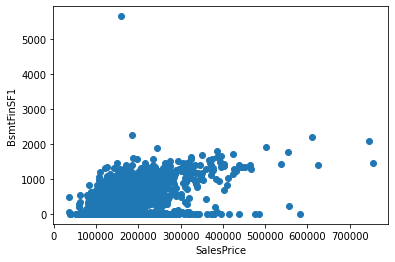

In [ ]:
#1.2

x = df['SalePrice']
y = df['BsmtFinSF1']

plt.scatter(x,y)
plt.xlabel('SalesPrice')
plt.ylabel('BsmtFinSF1')
plt.show


Problem 1.3 (5 Points) Produce a scatter plot using “LotArea” and “SalePrice” and impose a loess line on the top of the data.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


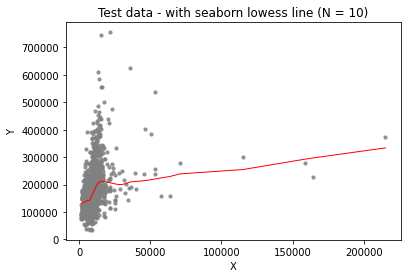

In [ ]:
#1.3

# Seaborne solution:
df1 = df[['LotArea', 'SalePrice']]
sns.regplot("LotArea", "SalePrice", data=df1,  color="grey", scatter_kws={"s": 10},
             line_kws={"color":"r","alpha":1,"lw":1} ,lowess=True)
plt.xlabel("X"), plt.ylabel("Y")
plt.title('Test data - with seaborn lowess line (N = 10)')
plt.show()

Problem 1.4 (5 Points) Produce a table with the following summary statistic including minimum, mean, median, variance, standard deviation, maximum, and skewness for the following threevariables “SalePrice”, “BsmtFinSF1”, and “LotArea”. (Note: Display only three decimal place)

In [ ]:
#1.4

#descriptive statistics for SalePrice
def descriptiveStatistics(select_columm):
    print(f'Min {select_columm} {round(df[select_columm].min(), 3)}')
    print(f'Mean {select_columm} {round(df[select_columm].mean(), 3)}')
    print(f'Median {select_columm} {round(df[select_columm].median(), 3)}')
    print(f'Variance {select_columm} {round(np.var(df[select_columm]), 3)}')
    print(f'Standard Deviation {select_columm} {round(np.std(df[select_columm]), 3)}')
    print(f'Max {select_columm} {round(df[select_columm].max(), 3)}')
    print(f'Skewness {select_columm} {round(skew(df[select_columm]), 3)}')


print('-------------------------------------')
print("SalePrice Data\n")
descriptiveStatistics("SalePrice")
print('-------------------------------------')
print("BsmtFinSF1 Data\n")
descriptiveStatistics('BsmtFinSF1')
print('-------------------------------------')
print("LotArea Data\n")
descriptiveStatistics('LotArea')
print('-------------------------------------')


-------------------------------------
SalePrice Data

Min SalePrice 34900
Mean SalePrice 180921.196
Median SalePrice 163000.0
Variance SalePrice 6306788585.349
Standard Deviation SalePrice 79415.292
Max SalePrice 755000
Skewness SalePrice 1.881
-------------------------------------
BsmtFinSF1 Data

Min BsmtFinSF1 0
Mean BsmtFinSF1 443.64
Median BsmtFinSF1 383.5
Variance BsmtFinSF1 207882.985
Standard Deviation BsmtFinSF1 455.942
Max BsmtFinSF1 5644
Skewness BsmtFinSF1 1.684
-------------------------------------
LotArea Data

Min LotArea 1300
Mean LotArea 10516.828
Median LotArea 9478.5
Variance LotArea 99557412.904
Standard Deviation LotArea 9977.846
Max LotArea 215245
Skewness LotArea 12.195
-------------------------------------


Problem 1.5 (5 Points) Obtain both the Spearman correlation and the Pearson correlation between the following variables “SalePrice”, “BsmtFinSF1”, and “LotArea”.

In [ ]:
#1.5

#SPEARMAN CORRELATION


spearman_data = df.corr(method='spearman')
print('SPEARMAN CORRELATION')
print(spearman_data)

#PEARSON CORRELATION
pearson_data = df.corr(method='pearson')
print('\nPEARSON CORRELATION')
print(pearson_data)

SPEARMAN CORRELATION
            Fireplaces  SalePrice   LotArea  BsmtFinSF1
Fireplaces    1.000000   0.519247  0.350198    0.192264
SalePrice     0.519247   1.000000  0.456461    0.301871
LotArea       0.350198   0.456461  1.000000    0.171995
BsmtFinSF1    0.192264   0.301871  0.171995    1.000000

PEARSON CORRELATION
            Fireplaces  SalePrice   LotArea  BsmtFinSF1
Fireplaces    1.000000   0.466929  0.271364    0.260011
SalePrice     0.466929   1.000000  0.263843    0.386420
LotArea       0.271364   0.263843  1.000000    0.214103
BsmtFinSF1    0.260011   0.386420  0.214103    1.000000


In [ ]:
#PEARSON CORRELATION
# Apply the pearsonr()

#calculate Pearson correlation and corresponding p-value
def run_pearson_correlation(column1, column2):

    #run Pearson correlation
    corr, _ = pearsonr(df[column1], df[column2])


    print(f'Pearsons correlation for {column1} and {column2} is : %.3f' % corr)


run_pearson_correlation('SalePrice', 'LotArea')
run_pearson_correlation('SalePrice', 'BsmtFinSF1')
run_pearson_correlation('LotArea', 'BsmtFinSF1')

Pearsons correlation for SalePrice and LotArea is : 0.264
Pearsons correlation for SalePrice and BsmtFinSF1 is : 0.386
Pearsons correlation for LotArea and BsmtFinSF1 is : 0.214


PROBLEM 2

STEP #1: Obtain rank of each case based on their “SalePrice”.  The rank of the case with the smallest ”SalePrice” has rank 1.

In [ ]:
#2.1

df["SalePrice_Rank"] = df["SalePrice"].rank()

# sorting w.r.t name column
df.sort_values("SalePrice", inplace = True)

# display after sorting w.r.t Name column
print(df)

      Fireplaces  SalePrice  LotArea  BsmtFinSF1  SalePrice_Rank
495            0      34900     7879         495             1.0
916            0      35311     9000          50             2.0
968            0      37900     5925           0             3.0
533            0      39300     5000           0             4.0
30             0      40000     8500           0             5.0
...          ...        ...      ...         ...             ...
803            1     582933    13891           0          1456.0
898            2     611657    12919        2188          1457.0
1169           1     625000    35760        1387          1458.0
1182           2     745000    15623        2096          1459.0
691            2     755000    21535        1455          1460.0

[1460 rows x 5 columns]


STEP #2: Split the data into 25 bins with each bin has approximately the same number of observations (58 or 59 observations per bin) based on the rank of “SalePrice”.  The observations with largest “SalePrice” go to bin #25 and with smallest “SalePrice” go to bin #1.

In [ ]:
#2.2

# 2.2 splitting SalePrice Rank into 25 bins (0-58, 59-117,..., 1402-1460)
rank_bins = pd.Series(pd.qcut(range(1460), 25)).value_counts()


rank_bins = rank_bins.reset_index().sort_values(by=['index'])

rank_bins.rename(columns={"index": "Bin_Range", 0:"Numbers_per_Bin"}, inplace=True)
rank_bins = rank_bins.reset_index()
rank_bins = rank_bins[['Bin_Range', 'Numbers_per_Bin']]


In [ ]:
 df['SalePrice_Rank'].head(100)


495       1.0
916       2.0
968       3.0
533       4.0
30        5.0
        ...  
1131     95.5
1137     97.0
232      98.0
97       99.0
1186    100.5
Name: SalePrice_Rank, Length: 100, dtype: float64

In [ ]:
#Maria- fixing the bin count
df["SalePrice_Rank"] = df["SalePrice"].rank(method = 'first')

# sorting w.r.t name column
df.sort_values("SalePrice", inplace = True)

# display after sorting w.r.t Name column
print(df)

      Fireplaces  SalePrice  LotArea  BsmtFinSF1  SalePrice_Rank
495            0      34900     7879         495             1.0
916            0      35311     9000          50             2.0
968            0      37900     5925           0             3.0
533            0      39300     5000           0             4.0
30             0      40000     8500           0             5.0
...          ...        ...      ...         ...             ...
803            1     582933    13891           0          1456.0
898            2     611657    12919        2188          1457.0
1169           1     625000    35760        1387          1458.0
1182           2     745000    15623        2096          1459.0
691            2     755000    21535        1455          1460.0

[1460 rows x 5 columns]


In [ ]:
#Maria
# 2.2 splitting SalePrice Rank into 25 bins (0-58, 59-117,..., 1402-1460)
binz = pd.qcut(df.SalePrice_Rank, q=25, labels=range(1,26))
binz

495      1
916      1
968      1
533      1
30       1
        ..
803     25
898     25
1169    25
1182    25
691     25
Name: SalePrice_Rank, Length: 1460, dtype: category
Categories (25, int64): [1 < 2 < 3 < 4 ... 22 < 23 < 24 < 25]

In [ ]:
#Maria
df['binz'] = pd.qcut(df.SalePrice_Rank, q=25, labels=range(1,26))
df

,Fireplaces,SalePrice,LotArea,BsmtFinSF1,SalePrice_Rank,binz
495,0,34900,7879,495,1.0,1
916,0,35311,9000,50,2.0,1
968,0,37900,5925,0,3.0,1
533,0,39300,5000,0,4.0,1
30,0,40000,8500,0,5.0,1
...,...,...,...,...,...,...
803,1,582933,13891,0,1456.0,25
898,2,611657,12919,2188,1457.0,25
1169,1,625000,35760,1387,1458.0,25
1182,2,745000,15623,2096,1459.0,25


In [ ]:
#Maria
df['binz'].value_counts()

1     59
9     59
23    59
20    59
17    59
14    59
12    59
25    59
3     59
6     59
8     58
18    58
24    58
22    58
21    58
4     58
19    58
5     58
10    58
16    58
15    58
2     58
7     58
11    58
13    58
Name: binz, dtype: int64

STEP #3: Calculate logit of each bin with the formula

logit=log(p/(1-p)), where p=(sum(FirePlace>0 in this bin)+0.5)/(Total Cases in this bin).


In [ ]:
#2.3
#Maria- idk if my groups syntax is quite right but this was my attempt
groups = df['SalePrice_Rank'].groupby(df['binz'])
groups

In [ ]:
#brendan
my_groups = df.groupby(df['binz']).mean().reset_index()
avg_sale_price_df = my_groups[['binz','SalePrice']]

In [ ]:
logit_dict = {}

for x in range(1,26):
    df1 = df[df['binz'] == x]
    y = df1['Fireplaces']
    p = (np.sum(df1['Fireplaces'] > 0) + 0.5) / len(df1['SalePrice_Rank'])
    logit = np.log(p / (1 - p))
    #Do something with logit
    logit_dict[x]= logit

logit_df = pd.DataFrame.from_dict(logit_dict, orient='index').reset_index()

logit_df = logit_df.rename(columns = {'index':'binz', 0:'logit'})


logit_df

<ipython-input-19-d460ad3c3a1f>:7: RuntimeWarning: invalid value encountered in log
  logit = np.log(p / (1 - p))


,binz,logit
0,1,-2.763620
1,2,-1.509354
2,3,-1.781907
3,4,-1.192800
4,5,-0.680244
5,6,-1.418383
6,7,-0.922333
7,8,-0.839101
8,9,-0.483797
9,10,-0.529259


In [ ]:
#merge logit df and average sale price df
combined_avg_logit_df = avg_sale_price_df.merge(logit_df, on=['binz'])

combined_avg_logit_df = combined_avg_logit_df.rename(columns={'SalePrice':"AvgSalePrice"})

combined_avg_logit_df.drop(combined_avg_logit_df.tail(1).index, inplace = True)

combined_avg_logit_df

,binz,AvgSalePrice,logit
0,1,71243.847458,-2.763620
1,2,92197.775862,-1.509354
2,3,105869.033898,-1.781907
3,4,113348.344828,-1.192800
4,5,120363.310345,-0.680244
5,6,126517.372881,-1.418383
6,7,131044.827586,-0.922333
7,8,135821.500000,-0.839101
8,9,140072.237288,-0.483797
9,10,144481.982759,-0.529259


STEP #4: Display the logit plot that is similar to 2.28 and Figure 2.29 in the lecture note.

In [ ]:
#2.4




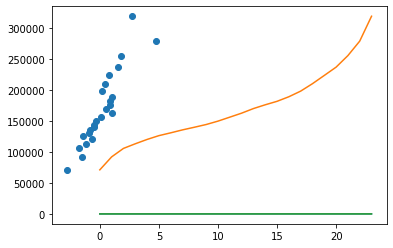

In [ ]:
plt.plot(combined_avg_logit_df)
plt.scatter(combined_avg_logit_df['logit'], combined_avg_logit_df['AvgSalePrice'])

plt.show()


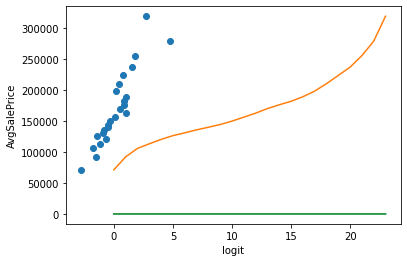

In [ ]:
#brendan

plt.plot(combined_avg_logit_df)
plt.scatter(combined_avg_logit_df['logit'], combined_avg_logit_df['AvgSalePrice'])
plt.xlabel("logit")
plt.ylabel("AvgSalePrice")
plt.show()
